# Purpose: to explore the BU projects to decide which data to include and omit from the training set. 
#### There are three splits of the data, and three or four categories of data to consider.

1. The training data used to train the model. 
2. The validaion data used during model evaluation.
3. The test data used to evaluate the final model. This will be withheld during the training process.
The final model will be run on soundscape recordings, so the model needs to be evaluated on soundscape recordings.
In addition, the model will be trained on short audio clips, so part of the evaluation process will look at how the model is performing on these clips.



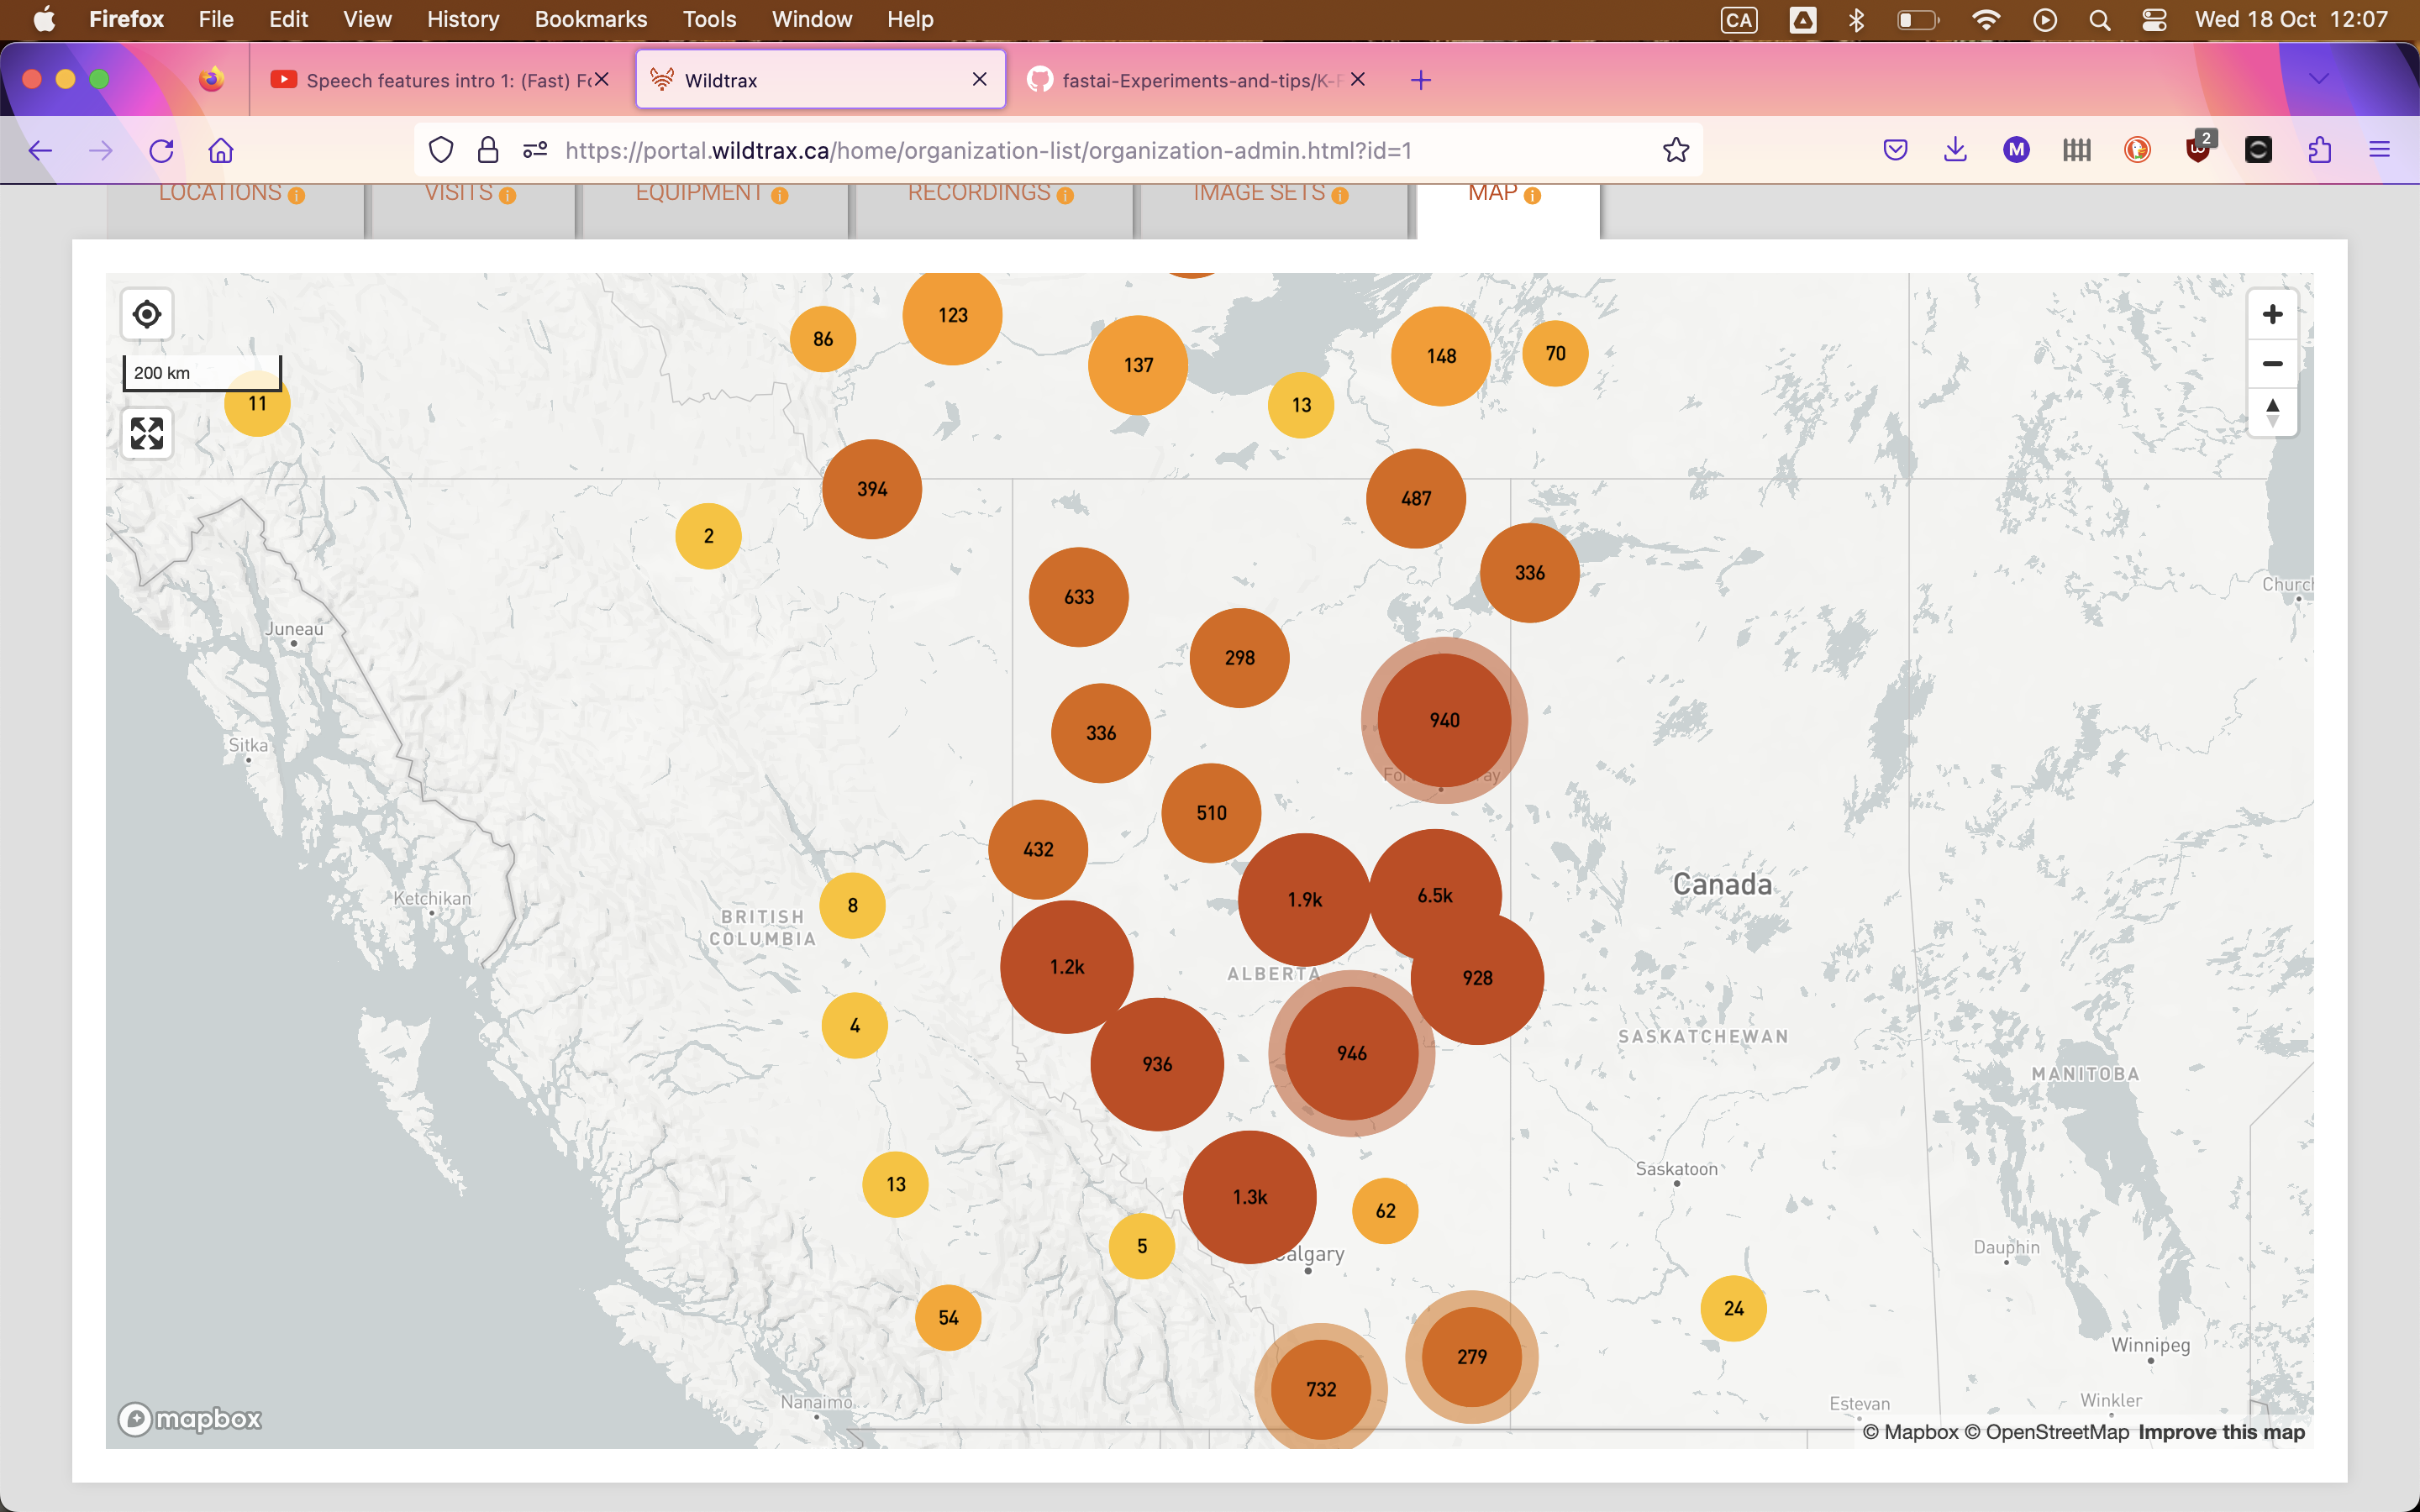

In [3]:
from IPython.display import Image
Image("./map_all.png")


### Proposed split options:
1. __Split the training, validation and test sets by ARU location ID.__
    This will have the advantage of making sure that the recordings all come from different locations, and so the model will not be overfit to the specifics of a particular location.
    <br>
2. __Split the training, validation and test sets by geographic area.__
    This will have the advantage of making sure that the recordings all come from different geographic regions, and so we may get an idea of how the model will generalize to other regions outside of the training area.<br>
3. __Randomly shuffle all the data and split into training, validation and test sets.__ This is the simplest method and will be used as a baseline.<br>
4. There are many more ways to split the data, by __date of recording__ we would get an idea of how the model performs on recent time windows, which could be relevant if the environmental noise or another factor is changing over time. 
If any of these options are chosen, the final use case of the model should be considered, in order to make sure that the final report is relevant to the use case.

<img src="./map_all.png" width="500" alt="geo locations of ARUs">

### There will be three or four categories of data to consider:
1. Audio samples containing an olive sided flycatcher call:
This is relatively simple since we have a list of clips that contain the call in the training csv file. <br>
2. Audio samples of birds which are not the olive sided flycatcer:
This is also simple, since we have a list of tags for other bird species, but there is no guaruntee that there isn't an olive sided flycatcher in the background of one of these tags. 

These first two sets of data can be used to train an initial model by treating set 1 as calls, and set 2 as no-calls, but there is prior knowledge embedded in the training data: that a bird call is present in the recording. 

To make a true 'no-call' data set, another step is proposed: take into account the tagging method used on WildTrax. There are two or three which I'm aware of:
- '1SPT' (one sample per time interval)
- '1SPM' (one sample per minute)
- no restrictions' (all of the vocalizations in the recording are tagged)

With this information, a recording ID, and the start and end time of an olive sided flycatcher clip, I can extract audio segments from before the first OSFL tag in a recording, and from segments of audio from between 60s, 120s (+n*60) and the start of an OSFL tag made within each minute.

A second source of true no-call could come from the recordings tagged with the 'no restrictions' tagging method, where there are no restrictions on the number of tags per recording. This could provide another denser source of true no-call data, but unfortunately the .csv file doesn't contain a label for 'no restrictions'. It may be that they were exported with the label 'None' instead but this is not clear.

These clips will have the advantage of containing periods of quiet, and the types of background noise associated with olive sided flycatcher habitat. 









In [48]:
import pandas as pd
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [53]:
data_path = Path("../../data/")
df = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')

In [67]:
df.loc[df['species_code'] == 'OSFL'].project.value_counts()

project
CWS-Ontario Birds of James Bay Lowlands 2021                     1752
CWS-Ontario Boreal Shield-Lowlands Transition 2022               1101
Boreal Wetland Community Monitoring                               698
Bayne-OSFL-BU-AnyYr 2021                                          301
Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021      139
Lebeuf-Taylor - 2023 RETN                                         137
Big Grids                                                         125
Retention                                                          75
CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)            75
Lebeuf-Taylor - 2021 RETN                                          71
Bioacoustic Unit Digital Point Counts                              57
CWS-Ontario Lake Superior NMCA 2021                                55
CWS-Ontario Incidental Atlas ARUs - 2022                           51
Natural Disturbance Long-term Monitoring Program 2016              46
Lebeuf-Taylo